In [1]:
import pandas as pd
from pathlib import Path
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
import numpy as np
import tensorflow as tf

In [2]:
#  Import and read the flight data for 2018.

clean_flights_18_df = pd.read_csv("Data_files/2018_cleaned_delays.csv")
clean_flights_18_df.head(20)

,CRS_DEP_TIME,DEP_TIME,TAXI_OUT,WHEELS_OFF,WHEELS_ON,TAXI_IN,ARR_TIME,DIVERTED,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,...,sched_dep_time_Afternoon,sched_dep_time_Evening,sched_dep_time_Morning,sched_dep_time_Night,season_Autumn,season_Spring,season_Summer,season_Winter,DIVERTED.1,DELAY
0,-0.825414,-0.783328,-0.660801,-0.812330,-0.458193,1.309147,-0.426571,-0.052084,0.191684,0.294236,...,0,0,1,0,0,0,0,1,0.0,0
1,1.678137,1.648116,-0.254994,1.616385,1.703989,-0.952306,-2.726416,-0.052084,-0.567662,-1.009358,...,0,1,0,0,0,0,0,1,0.0,0
2,0.082282,0.081053,-0.052090,0.139679,0.099851,-0.349252,0.103588,-0.052084,0.647291,0.581027,...,1,0,0,0,0,0,0,1,0.0,0
3,1.982110,1.885671,-0.052090,1.936371,-2.747116,-0.650779,-2.709615,-0.052084,0.738413,0.294236,...,0,1,0,0,0,0,0,1,0.0,0
4,-0.825414,-0.787320,-0.559349,-0.814317,-0.951919,0.856857,-0.844725,-0.052084,-0.324671,-0.279345,...,0,0,1,0,0,0,0,1,0.0,0
5,-1.479799,-1.398176,-0.254994,-1.416527,-1.171353,-0.952306,-1.158340,-0.052084,-0.810652,-0.852926,...,0,0,1,0,0,0,0,1,0.0,0
6,0.941426,0.895527,-0.457897,0.942625,0.937861,0.404566,1.014565,-0.052084,0.100562,0.059589,...,1,0,0,0,0,0,0,1,0.0,0
7,0.230046,0.216798,-0.762253,0.181416,0.289018,-0.047724,0.293997,-0.052084,0.191684,-0.096842,...,1,0,0,0,0,0,0,1,0.0,0
8,1.678137,1.594217,-0.457897,1.558748,1.609405,-0.650779,1.589527,-0.052084,0.252431,0.007445,...,0,1,0,0,0,0,0,1,0.0,0
9,0.629010,0.634017,-0.457897,0.602764,0.693836,0.253803,0.697217,-0.052084,0.070188,0.085661,...,1,0,0,0,0,0,0,1,0.0,1


In [3]:
list(clean_flights_18_df.columns)

['CRS_DEP_TIME',
 'DEP_TIME',
 'TAXI_OUT',
 'WHEELS_OFF',
 'WHEELS_ON',
 'TAXI_IN',
 'ARR_TIME',
 'DIVERTED',
 'CRS_ELAPSED_TIME',
 'ACTUAL_ELAPSED_TIME',
 'AIR_TIME',
 'DISTANCE',
 'OP_CARRIER_AA',
 'OP_CARRIER_DL',
 'OP_CARRIER_OO',
 'OP_CARRIER_UA',
 'OP_CARRIER_WN',
 'ORIGIN_ATL',
 'ORIGIN_CLT',
 'ORIGIN_DEN',
 'ORIGIN_DFW',
 'ORIGIN_ORD',
 'DEST_ATL',
 'DEST_CLT',
 'DEST_DEN',
 'DEST_DFW',
 'DEST_ORD',
 'WEEKDAY_Friday',
 'WEEKDAY_Monday',
 'WEEKDAY_Saturday',
 'WEEKDAY_Sunday',
 'WEEKDAY_Thursday',
 'WEEKDAY_Tuesday',
 'WEEKDAY_Wednesday',
 'sched_dep_time_Afternoon',
 'sched_dep_time_Evening',
 'sched_dep_time_Morning',
 'sched_dep_time_Night',
 'season_Autumn',
 'season_Spring',
 'season_Summer',
 'season_Winter',
 'DIVERTED.1',
 'DELAY']

In [5]:
X = clean_flights_18_df.copy()
X.drop("DELAY", axis=1, inplace=True)
X.head()

,CRS_DEP_TIME,DEP_TIME,TAXI_OUT,WHEELS_OFF,WHEELS_ON,TAXI_IN,ARR_TIME,DIVERTED,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,...,WEEKDAY_Wednesday,sched_dep_time_Afternoon,sched_dep_time_Evening,sched_dep_time_Morning,sched_dep_time_Night,season_Autumn,season_Spring,season_Summer,season_Winter,DIVERTED.1
0,-0.825414,-0.783328,-0.660801,-0.812330,-0.458193,1.309147,-0.426571,-0.052084,0.191684,0.294236,...,0,0,0,1,0,0,0,0,1,0.0
1,1.678137,1.648116,-0.254994,1.616385,1.703989,-0.952306,-2.726416,-0.052084,-0.567662,-1.009358,...,0,0,1,0,0,0,0,0,1,0.0
2,0.082282,0.081053,-0.052090,0.139679,0.099851,-0.349252,0.103588,-0.052084,0.647291,0.581027,...,0,1,0,0,0,0,0,0,1,0.0
3,1.982110,1.885671,-0.052090,1.936371,-2.747116,-0.650779,-2.709615,-0.052084,0.738413,0.294236,...,0,0,1,0,0,0,0,0,1,0.0
4,-0.825414,-0.787320,-0.559349,-0.814317,-0.951919,0.856857,-0.844725,-0.052084,-0.324671,-0.279345,...,0,0,0,1,0,0,0,0,1,0.0


In [7]:
y = clean_flights_18_df["DELAY"].values.reshape(-1, 1)
y[:30]

array([[0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0]], dtype=int64)

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78)

In [9]:
rf_model = RandomForestClassifier(n_estimators=500, random_state=78)

In [11]:
rf_model = rf_model.fit(X_train, y_train.ravel())

In [12]:
# Making predictions using the testing data
predictions = rf_model.predict(X_test)

In [13]:
# Calculating the confusion matrix
cm = confusion_matrix(y_test, predictions)
cm_df = pd.DataFrame(
    cm, index=["Actual 0", "Actual 1"], columns=["Predicted 0", "Predicted 1"]
)

# Calculating the accuracy score
acc_score = accuracy_score(y_test, predictions)

In [14]:
# Displaying results
print("Confusion Matrix")
display(cm_df)
print(f"Accuracy Score : {acc_score}")
print("Classification Report")
print(classification_report(y_test, predictions))

Confusion Matrix


,Predicted 0,Predicted 1
Actual 0,15344,556
Actual 1,1319,7824


Accuracy Score : 0.9251287785009783
Classification Report
              precision    recall  f1-score   support

           0       0.92      0.97      0.94     15900
           1       0.93      0.86      0.89      9143

    accuracy                           0.93     25043
   macro avg       0.93      0.91      0.92     25043
weighted avg       0.93      0.93      0.92     25043



In [15]:
 # Get the feature importance array
importances = rf_model.feature_importances_
# List the top 10 most important features
importances_sorted = sorted(zip(rf_model.feature_importances_, X.columns), reverse=True)
importances_sorted[:10]

[(0.1170005347411101, 'TAXI_OUT'),
 (0.10941703388021128, 'ACTUAL_ELAPSED_TIME'),
 (0.09494621638170495, 'CRS_DEP_TIME'),
 (0.08834483318073438, 'ARR_TIME'),
 (0.08464536408103411, 'WHEELS_OFF'),
 (0.08106888605396705, 'DEP_TIME'),
 (0.08025836652954332, 'WHEELS_ON'),
 (0.0718436119489313, 'CRS_ELAPSED_TIME'),
 (0.057846300437270674, 'AIR_TIME'),
 (0.051124672180548406, 'TAXI_IN')]

<Axes: title={'center': 'Features Importances'}, ylabel='1'>

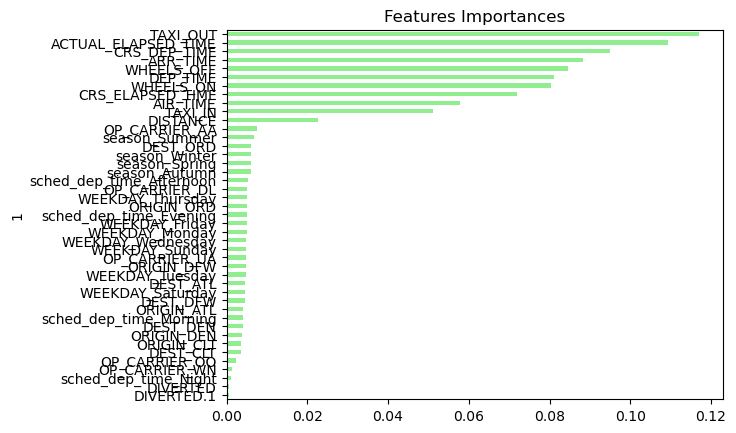

In [16]:
importances_df = pd.DataFrame(sorted(zip(rf_model.feature_importances_, X.columns), reverse=True))
importances_df.set_index(importances_df[1], inplace=True)
importances_df.drop(columns=1, inplace=True)
importances_df.rename(columns={0: 'Feature Importances'}, inplace=True)
importances_sorted = importances_df.sort_values(by='Feature Importances')
importances_sorted.plot(kind='barh', color='lightgreen', title= 'Features Importances', legend=False)